In [140]:
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# Part 1

In [23]:
DIRECTIONS = {"U":(0,1),"R":(1,0),"L":(-1,0),"D":(0,-1)}

In [29]:
def processinstructions(filename):
    with open(filename) as f:
        for line in f:
            a,b,c = re.search("([U|R|L|D]) (\d+) \((#.{6})\)",line.rstrip()).groups()
            yield a,int(b),c
diginstructions = processinstructions("input18.txt")

In [30]:
def digedges(instructions):
    x,y =(0,0)
    hole = {(0,0):None}
    for dir,n,color in instructions:
        dx,dy = DIRECTIONS[dir]
        for _ in range(n):
            x+=dx
            y+=dy
            hole[(x,y)] = color
    return hole

In [63]:
from PIL import ImageColor


In [75]:
def isinbounds(x,y,N,M):
    return x>=0 and x<M and y>=0 and y<N

In [99]:
def excavatehole(hole):
    minx,maxx,miny,maxy = 0,0,0,0
    for x,y in hole.keys():
        minx = min(minx,x)
        maxx = max(maxx,x+1)
        miny = min(miny,y)
        maxy = max(maxy,y+1)
    hole2d = np.ones((maxy-miny+10,maxx-minx+10),dtype=int)
    for (x,y),c in hole.items():
        hole2d[y-miny+3,x-minx+3] = 2
    N,M = hole2d.shape

    neighbours =[(0,0)]
    while neighbours:
        x,y = neighbours.pop()
        hole2d[y,x]=0
        for dx,dy in DIRECTIONS.values():
            if isinbounds(x+dx,y+dy,N,M) and hole2d[y+dy,x+dx]==1:
                neighbours.append((x+dx,y+dy))

    return hole2d

In [104]:
def buildimg(hole):
    minx,maxx,miny,maxy = 0,0,0,0
    for x,y in hole.keys():
        minx = min(minx,x)
        maxx = max(maxx,x+1)
        miny = min(miny,y)
        maxy = max(maxy,y+1)
    img = np.zeros((maxy-miny+10,maxx-minx+10,3),dtype=int)
    for (x,y),c in hole.items():
        img[y-miny+3,x-minx+3] = ImageColor.getcolor(c,"RGB")
    return img


In [106]:
img = buildimg(hole) 
hole2d = excavatehole(hole)
colorblindhole = (hole2d>0).sum()
colorblindhole.sum()

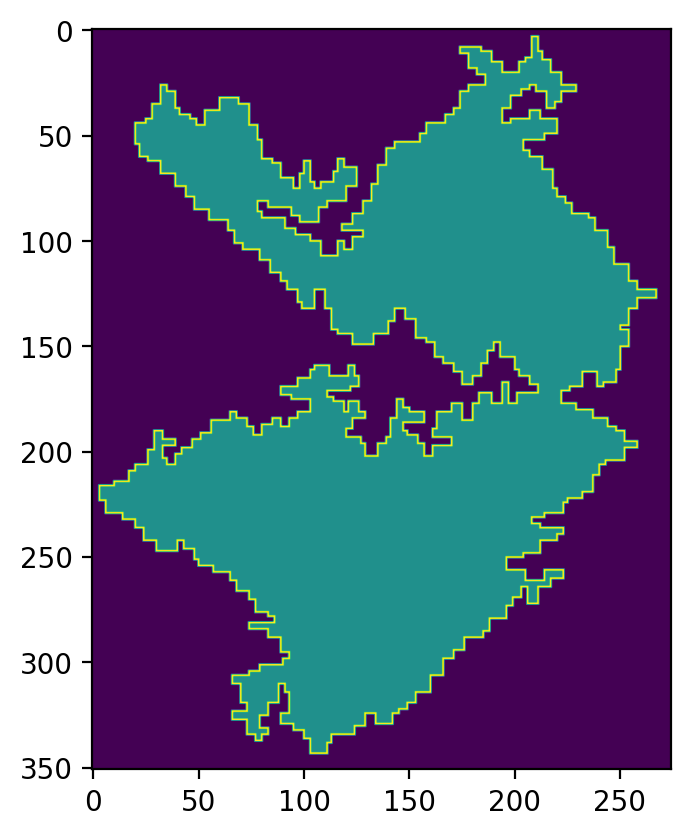

In [107]:
plt.imshow(hole2d)

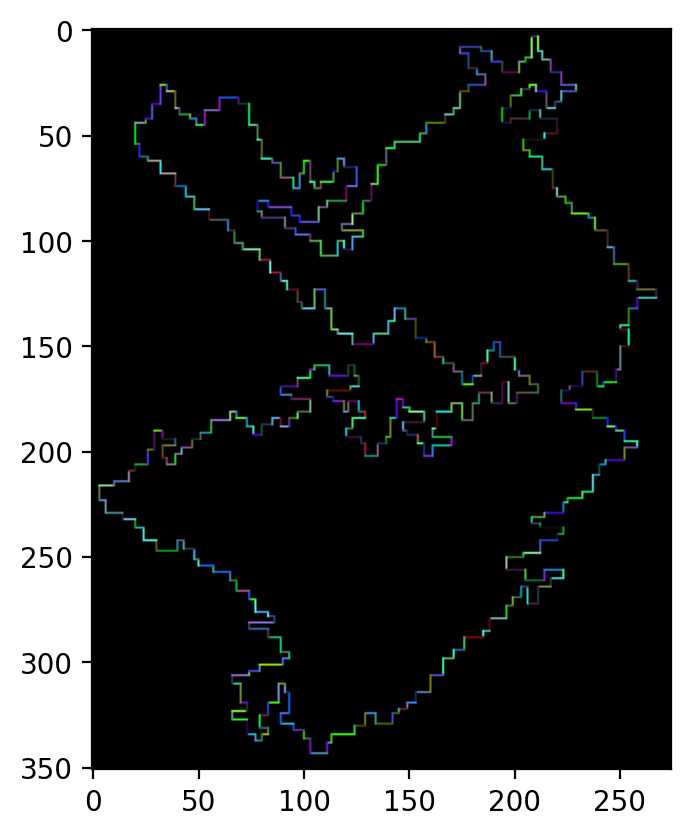

In [108]:
plt.imshow(img)


# Part 2

In [113]:
def processcorrectinstructions(filename):
    inttodir = {"0":"R","1":"D","2":"L","3":"U"}
    with open(filename) as f:
        for line in f:
            a,b = re.search(".*\(#(.{5})(.)\)",line.rstrip()).groups()

            yield inttodir[b],int(a,16)
correctdig = processcorrectinstructions("input18.txt")

In [116]:
import shapely

In [120]:
def getholepolygon(instructions):
    x,y =(0,0)
    hole = [(0,0)]
    for dir,n in instructions:
        dx,dy = DIRECTIONS[dir]
        x+=n*dx
        y+=n*dy
        hole.append((x,y))
    return shapely.Polygon(hole)
        

In [139]:
correctdig = processcorrectinstructions("input18.txt")
centroid = getholepolygon(correctdig)
fullhole = centroid
for corner in (np.array([1/2,1/2]),np.array([-1/2,-1/2]),np.array([-1/2,1/2]),np.array([1/2,-1/2])):
    fullhole = shapely.union(fullhole,shapely.transform(centroid, lambda x:x+corner))
int(fullhole.area)

83605563360288